In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl
from npc_sessions import DynamicRoutingSession
from dynamic_routing_analysis import spike_utils

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

%load_ext autoreload 
%matplotlib widget


In [2]:
#load decoder results
loadpath=r'C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR decoding results\by_session\separate_areas_by_probe'

svc_results={}
decoder_results=os.listdir(loadpath)

for ii,ff in enumerate(decoder_results):
    with open(os.path.join(loadpath,ff),'rb') as handle:
        svc_results[ii]=pickle.load(handle)
    print(ff)

626791_2022-08-15_0_separate_areas_by_probe.pkl
626791_2022-08-17_0_separate_areas_by_probe.pkl
636766_2023-01-23_0_separate_areas_by_probe.pkl
636766_2023-01-24_0_separate_areas_by_probe.pkl
636766_2023-01-25_0_separate_areas_by_probe.pkl
636766_2023-01-26_0_separate_areas_by_probe.pkl
644864_2023-01-30_0_separate_areas_by_probe.pkl
644864_2023-01-31_0_separate_areas_by_probe.pkl
644864_2023-02-01_0_separate_areas_by_probe.pkl
644864_2023-02-02_0_separate_areas_by_probe.pkl
644866_2023-02-07_0_separate_areas_by_probe.pkl
644866_2023-02-09_0_separate_areas_by_probe.pkl
644866_2023-02-10_0_separate_areas_by_probe.pkl
644867_2023-02-20_0_separate_areas_by_probe.pkl
644867_2023-02-22_0_separate_areas_by_probe.pkl
644867_2023-02-23_0_separate_areas_by_probe.pkl
649943_2023-02-13_0_separate_areas_by_probe.pkl
649943_2023-02-14_0_separate_areas_by_probe.pkl
649943_2023-02-15_0_separate_areas_by_probe.pkl
649943_2023-02-16_0_separate_areas_by_probe.pkl
660023_2023-08-09_0_separate_areas_by_pr

In [3]:
# all unique areas in results
all_areas=[]
for sel_session in range(0,len(svc_results)):
    all_areas.append(list(svc_results[sel_session]['block_ids'].keys()))
    
all_areas=np.unique(np.hstack(all_areas))
all_areas

plot_results={}
plot_shuffle_results={}
timepoints=svc_results[0]['time_bins'][1:]
label_list=['vis','aud']
predict=['block_ids']
areas=all_areas

n_units=svc_results[0]['unit_numbers']
unit_numbers=np.arange(0,len(n_units))


for sel_session in range(0,len(svc_results)):
    plot_results[sel_session]={}
    plot_shuffle_results[sel_session]={}
    for aa in areas:
        plot_results[sel_session][aa]={}
        plot_shuffle_results[sel_session][aa]={}
        for p in predict:
            plot_results[sel_session][aa][p]={}
            plot_shuffle_results[sel_session][aa][p]={}
            for uu in unit_numbers:
                plot_results[sel_session][aa][p][uu]={}
                plot_shuffle_results[sel_session][aa][p][uu]={}
                for ll in label_list:
                    plot_results[sel_session][aa][p][uu][ll]=np.zeros((len(timepoints),svc_results[sel_session]['n_repeats']))
                    plot_results[sel_session][aa][p][uu][ll][:]=np.nan

                    plot_shuffle_results[sel_session][aa][p][uu][ll]=np.zeros((len(timepoints),svc_results[sel_session]['n_repeats']))
                    plot_shuffle_results[sel_session][aa][p][uu][ll][:]=np.nan

decoder_acc_session_mean = {}
decoder_acc_session_shuffle_mean = {}
decoder_acc_session_median = {}
decoder_acc_session_shuffle_median = {}

for aa in areas:
    decoder_acc_session_mean[aa]={}
    decoder_acc_session_shuffle_mean[aa]={}
    decoder_acc_session_median[aa]={}
    decoder_acc_session_shuffle_median[aa]={}
    for p in predict:
        decoder_acc_session_mean[aa][p]={}
        decoder_acc_session_shuffle_mean[aa][p]={}
        decoder_acc_session_median[aa][p]={}
        decoder_acc_session_shuffle_median[aa][p]={}
        for uu in unit_numbers:
            decoder_acc_session_mean[aa][p][uu]={}
            decoder_acc_session_shuffle_mean[aa][p][uu]={}
            decoder_acc_session_median[aa][p][uu]={}
            decoder_acc_session_shuffle_median[aa][p][uu]={}
            for ll in label_list:

                decoder_acc_session_mean[aa][p][uu][ll]=np.zeros((len(timepoints),
                                                               len(svc_results)))
                decoder_acc_session_mean[aa][p][uu][ll][:]=np.nan

                decoder_acc_session_shuffle_mean[aa][p][uu][ll]=np.zeros((len(timepoints),
                                                               len(svc_results)))
                decoder_acc_session_shuffle_mean[aa][p][uu][ll][:]=np.nan

                decoder_acc_session_median[aa][p][uu][ll]=np.zeros((len(timepoints),
                                                               len(svc_results)))
                decoder_acc_session_median[aa][p][uu][ll][:]=np.nan

                decoder_acc_session_shuffle_median[aa][p][uu][ll]=np.zeros((len(timepoints),
                                                               len(svc_results)))
                decoder_acc_session_shuffle_median[aa][p][uu][ll][:]=np.nan
        

for sel_session in range(0,len(svc_results)):
    for p in predict:
        for aa in areas: 
            if aa in svc_results[sel_session][p].keys():
                for tt,tp in enumerate(timepoints):
                    for uu in unit_numbers:
                        for nn in range(0,svc_results[sel_session]['n_repeats']):
                            for ll in label_list:
                                if len(svc_results[sel_session][p][aa])>0:
                                    if len(svc_results[sel_session][p][aa][tt])>0:
                                        if len(svc_results[sel_session][p][aa][tt][uu])>0:
                                            if ll in svc_results[sel_session][p][aa][tt][uu][nn]['cr'].keys():
                                                temp_perf=np.nanmean(
                                                    [svc_results[sel_session][p][aa][tt][uu][nn]['cr'][ll]['precision'],
                                                     svc_results[sel_session][p][aa][tt][uu][nn]['cr'][ll]['recall']]
                                                     )
                                                plot_results[sel_session][aa][p][uu][ll][tt,nn]=temp_perf

                                                temp_shuff_perf=np.nanmean(
                                                    [svc_results[sel_session][p][aa][tt][uu][nn]['shuffle']['cr'][ll]['precision'],
                                                     svc_results[sel_session][p][aa][tt][uu][nn]['shuffle']['cr'][ll]['recall']]
                                                     )
                                                plot_shuffle_results[sel_session][aa][p][uu][ll][tt,nn]=temp_shuff_perf

                            for ll in label_list:
                                if len(svc_results[sel_session][p][aa])>0:                    
                                    decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][uu][ll][tt])
                                    decoder_acc_session_mean[aa][p][uu][ll][tt,sel_session] = decoder_acc_mean

                                    decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][uu][ll][tt])
                                    decoder_acc_session_shuffle_mean[aa][p][uu][ll][tt,sel_session] = decoder_acc_shuffle_mean

                                    decoder_acc_median = np.nanmedian(plot_results[sel_session][aa][p][uu][ll][tt])
                                    decoder_acc_session_median[aa][p][uu][ll][tt,sel_session] = decoder_acc_median

                                    decoder_acc_shuffle_median = np.nanmedian(plot_shuffle_results[sel_session][aa][p][uu][ll][tt])
                                    decoder_acc_session_shuffle_median[aa][p][uu][ll][tt,sel_session] = decoder_acc_shuffle_median

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_32024\2790212581.py:104: RuntimeWarning: Mean of empty slice
  decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][uu][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_32024\2790212581.py:107: RuntimeWarning: Mean of empty slice
  decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][uu][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_32024\2790212581.py:110: RuntimeWarning: All-NaN slice encountered
  decoder_acc_median = np.nanmedian(plot_results[sel_session][aa][p][uu][ll][tt])
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_32024\2790212581.py:113: RuntimeWarning: All-NaN slice encountered
  decoder_acc_shuffle_median = np.nanmedian(plot_shuffle_results[sel_session][aa][p][uu][ll][tt])


In [ ]:
svc_results[0]['block_ids'].keys()

In [ ]:
svc_results[0]['unit_numbers']

In [ ]:
svc_results[0]['block_ids']['CA1_probeC']['n_units']

In [ ]:
session.performance

In [7]:
# #TODO: Add a measure of behavioral performance to this table

# ccf_coords_by_session_area={
#     'session_id':[],
#     'structure':[],
#     'x':[],
#     'y':[],
#     'z':[],
#     'n_units':[],
#     'average_performance':[],
#     'blockwise_performance':[],
# }

# for uu in range(0,len(svc_results[sel_session]['unit_numbers'])):
#     ccf_coords_by_session_area['decoder_accuracy_'+str(svc_results[0]['unit_numbers'][uu])+'_units']=[]

#loop through sessions, load units tables
for sel_session in range(37,len(svc_results)):
    session_id=svc_results[sel_session]['metadata'].session_id
    print(session_id)
    session=DynamicRoutingSession(session_id)

    structure_probe=spike_utils.get_structure_probe(session)

    session_performance=session.performance[:]

    average_performance=session.performance[:]['cross_modal_dprime'].mean()
    blockwise_performance=session.performance[:]['cross_modal_dprime']

    #calculate average position for each set of units in an area
    for sa in structure_probe['structure_probe'].unique():
        if sa in svc_results[sel_session]['block_ids'].keys():
        
            session_area_unit_ids=structure_probe.query('structure_probe==@sa')['unit_id'].index.values
            session_area_units=session.units[:].iloc[session_area_unit_ids] #[:].query('unit_id==@session_area_unit_ids')

            x_mean=np.nanmean(session_area_units['peak_channel_x'])
            y_mean=np.nanmean(session_area_units['peak_channel_y'])
            z_mean=np.nanmean(session_area_units['peak_channel_z'])

            #save CCF coordinates for each area, organized by session
            ccf_coords_by_session_area['session_id'].append(session_id)
            ccf_coords_by_session_area['structure'].append(sa)
            ccf_coords_by_session_area['x'].append(x_mean)
            ccf_coords_by_session_area['y'].append(y_mean)
            ccf_coords_by_session_area['z'].append(z_mean)
            ccf_coords_by_session_area['n_units'].append(svc_results[sel_session]['block_ids'][sa]['n_units'])
            ccf_coords_by_session_area['average_performance'].append(average_performance)
            ccf_coords_by_session_area['blockwise_performance'].append(blockwise_performance)

            
            for uu in range(0,len(svc_results[sel_session]['unit_numbers'])):

                temp_acc=np.nanmean(np.vstack([
                    plot_results[sel_session][sa]['block_ids'][uu]['vis'][0,:],
                    plot_results[sel_session][sa]['block_ids'][uu]['aud'][0,:]
                ]))

                ccf_coords_by_session_area[
                    'decoder_accuracy_'+str(svc_results[0]['unit_numbers'][uu])+'_units'
                    ].append(temp_acc)


ccf_coords_by_session_area=pd.DataFrame(ccf_coords_by_session_area)
ccf_coords_by_session_area


674562_2023-10-05


fetching units: 100%|█████████████████████████| 5/5 [03:06<00:00, 37.39s/device]
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  

681532_2023-10-16


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\npc_lims\metadata\codeocean.py:141: UserWarning: There is more than one asset for session = '681532_2023-10-16'. Defaulting to most recent: ('ecephys_681532_2023-10-16_12-44-24_sorted_2023-10-19_21-13-38', 'ecephys_681532_2023-10-16_12-44-24_sorted-ks2.5_2023-10-26_10-37-17', 'ecephys_681532_2023-10-16_12-44-24_sorted-ks2.5_2023-10-24_02-51-49')
  warnings.warn(
fetching units: 100%|█████████████████████████| 6/6 [04:40<00:00, 46.81s/device]
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Anaconda3\envs\npc_analysis\Lib\

681532_2023-10-17


fetching units: 100%|█████████████████████████| 4/4 [03:57<00:00, 59.29s/device]
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  

681532_2023-10-18


fetching units: 100%|█████████████████████████| 6/6 [04:54<00:00, 49.15s/device]
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  

,session_id,structure,x,y,z,n_units,average_performance,blockwise_performance,decoder_accuracy_20_units,decoder_accuracy_50_units,decoder_accuracy_all_units
0,626791_2022-08-15,VPM,6971.176471,4553.529412,4360.882353,85,1.704476,id 0 2.974365 1 1.991225 2 1.373955 3...,0.679065,0.715123,0.717085
1,626791_2022-08-15,PO,6852.692308,3943.461538,4465.000000,130,1.704476,id 0 2.974365 1 1.991225 2 1.373955 3...,0.693771,0.720194,0.686063
2,626791_2022-08-15,LP,6774.687500,3476.875000,4568.437500,80,1.704476,id 0 2.974365 1 1.991225 2 1.373955 3...,0.668909,0.685335,0.680832
3,626791_2022-08-15,LD,6734.782609,3243.478261,4602.173913,46,1.704476,id 0 2.974365 1 1.991225 2 1.373955 3...,0.620580,NaN,0.662054
4,626791_2022-08-15,CA1_probeA,6598.484848,2123.484848,4846.212121,33,1.704476,id 0 2.974365 1 1.991225 2 1.373955 3...,0.599335,NaN,0.619123
...,...,...,...,...,...,...,...,...,...,...,...
698,681532_2023-10-18,CA3_probeE,8288.020833,3478.125000,2774.479167,48,2.248234,id 0 2.634454 1 2.077642 2 2.801652 3...,0.510666,NaN,0.510756
699,681532_2023-10-18,CA1_probeE,8163.000000,2837.500000,2224.500000,50,2.248234,id 0 2.634454 1 2.077642 2 2.801652 3...,0.534687,0.553644,0.542532
700,681532_2023-10-18,AUDd,7977.777778,2034.090909,1886.363636,99,2.248234,id 0 2.634454 1 2.077642 2 2.801652 3...,0.614553,0.652274,0.670233
701,681532_2023-10-18,CP_probeF,5098.161765,3908.639706,3372.610294,136,2.248234,id 0 2.634454 1 2.077642 2 2.801652 3...,0.681737,0.716355,0.727838


In [6]:
# session.id
sel_session

36

In [ ]:
# ccf_coords_by_session_area={
#     'session_id':[],
#     'structure':[],
#     'x':[],
#     'y':[],
#     'z':[],
#     'n_units':[],
# }

# for uu in range(0,len(svc_results[sel_session]['unit_numbers'])):
#     ccf_coords_by_session_area['decoder_accuracy_'+str(svc_results[0]['unit_numbers'][uu])+'_units']=[]

# for sa in structure_probe['structure_probe'].unique():
#     if sa in svc_results[sel_session]['block_ids'].keys():
    
#         session_area_unit_ids=structure_probe.query('structure_probe==@sa')['unit_id'].index.values
#         session_area_units=session.units[:].iloc[session_area_unit_ids]#[:].query('unit_id==@session_area_unit_ids')

#         x_mean=np.nanmean(session_area_units['peak_channel_x'])
#         y_mean=np.nanmean(session_area_units['peak_channel_y'])
#         z_mean=np.nanmean(session_area_units['peak_channel_z'])

#         #save CCF coordinates for each area, organized by session
#         ccf_coords_by_session_area['session_id'].append(session_id)
#         ccf_coords_by_session_area['structure'].append(sa)
#         ccf_coords_by_session_area['x'].append(x_mean)
#         ccf_coords_by_session_area['y'].append(y_mean)
#         ccf_coords_by_session_area['z'].append(z_mean)
#         ccf_coords_by_session_area['n_units'].append(svc_results[sel_session]['block_ids'][sa]['n_units'])
        
#         for uu in range(0,len(svc_results[sel_session]['unit_numbers'])):

#             temp_acc=np.nanmean(np.vstack([
#                 plot_results[sel_session][sa]['block_ids'][uu]['vis'][0,:],
#                 plot_results[sel_session][sa]['block_ids'][uu]['aud'][0,:]
#             ]))

#             ccf_coords_by_session_area[
#                 'decoder_accuracy_'+str(svc_results[0]['unit_numbers'][uu])+'_units'
#                 ].append(temp_acc)

In [8]:
ccf_coords_by_session_area.to_csv(r'C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR decoding results\separate area by probe\decoder_accuracy_by_insertion_area_update.csv')

In [ ]:
# ccf_coords_by_session_area=pd.read_csv(r'C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR decoding results\separate area by probe\decoder_accuracy_by_insertion_area_update.csv')

In [11]:
ccf_coords_by_session_area.columns

Index(['session_id', 'structure', 'x', 'y', 'z', 'n_units',
       'average_performance', 'blockwise_performance',
       'decoder_accuracy_20_units', 'decoder_accuracy_50_units',
       'decoder_accuracy_all_units'],
      dtype='object')

In [14]:
ccf_coords_by_session_area.query('average_performance>1.5')

,session_id,structure,x,y,z,n_units,average_performance,blockwise_performance,decoder_accuracy_20_units,decoder_accuracy_50_units,decoder_accuracy_all_units
0,626791_2022-08-15,VPM,6971.176471,4553.529412,4360.882353,85,1.704476,id 0 2.974365 1 1.991225 2 1.373955 3...,0.679065,0.715123,0.717085
1,626791_2022-08-15,PO,6852.692308,3943.461538,4465.000000,130,1.704476,id 0 2.974365 1 1.991225 2 1.373955 3...,0.693771,0.720194,0.686063
2,626791_2022-08-15,LP,6774.687500,3476.875000,4568.437500,80,1.704476,id 0 2.974365 1 1.991225 2 1.373955 3...,0.668909,0.685335,0.680832
3,626791_2022-08-15,LD,6734.782609,3243.478261,4602.173913,46,1.704476,id 0 2.974365 1 1.991225 2 1.373955 3...,0.620580,NaN,0.662054
4,626791_2022-08-15,CA1_probeA,6598.484848,2123.484848,4846.212121,33,1.704476,id 0 2.974365 1 1.991225 2 1.373955 3...,0.599335,NaN,0.619123
...,...,...,...,...,...,...,...,...,...,...,...
698,681532_2023-10-18,CA3_probeE,8288.020833,3478.125000,2774.479167,48,2.248234,id 0 2.634454 1 2.077642 2 2.801652 3...,0.510666,NaN,0.510756
699,681532_2023-10-18,CA1_probeE,8163.000000,2837.500000,2224.500000,50,2.248234,id 0 2.634454 1 2.077642 2 2.801652 3...,0.534687,0.553644,0.542532
700,681532_2023-10-18,AUDd,7977.777778,2034.090909,1886.363636,99,2.248234,id 0 2.634454 1 2.077642 2 2.801652 3...,0.614553,0.652274,0.670233
701,681532_2023-10-18,CP_probeF,5098.161765,3908.639706,3372.610294,136,2.248234,id 0 2.634454 1 2.077642 2 2.801652 3...,0.681737,0.716355,0.727838


In [13]:
len(ccf_coords_by_session_area)

703

In [ ]:
# session.units[:]['peak_channel_x']
# structure_probe=spike_utils.get_structure_probe(session)
# structure_probe
# session_area_units=session.units[:].iloc[session_area_unit_ids]
# sel_session
# len(svc_results)

In [ ]:
# ccf_coords_by_session_area=pd.DataFrame(ccf_coords_by_session_area)
ccf_coords_by_session_area

In [ ]:
#x=AP (invert), y=ML (invert), z=DV 
#x=AP (invert), y=DV (invert), z=ML

In [ ]:
# area_insertions

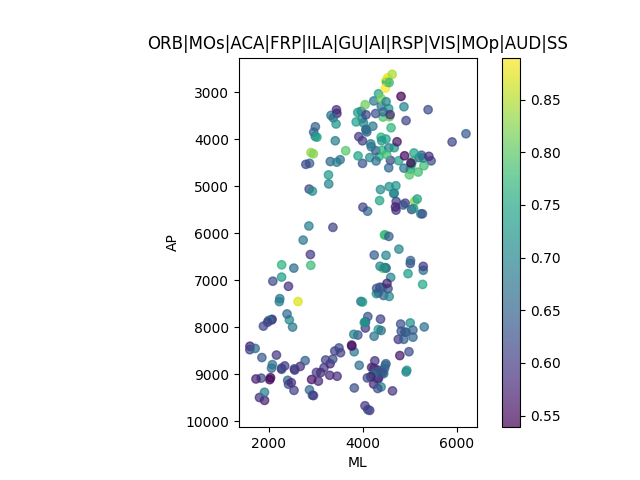

In [15]:
sel_area='ORB|MOs|ACA|FRP|ILA|GU|AI|RSP|VIS|MOp|AUD|SS'
dprime_threshold=1.5
# sel_area='CP'
# sel_area='SC'
# sel_area='MRN'
# sel_area='MOp'
# sel_area='VIS'
# sel_area='AUD'
# sel_area='RSP'

area_insertions=ccf_coords_by_session_area.query('structure.str.contains(@sel_area) and average_performance>@dprime_threshold')

fig,ax=plt.subplots(1,1)
points=ax.scatter(area_insertions['z'],area_insertions['x'],c=area_insertions['decoder_accuracy_20_units'],alpha=0.7)
# ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlabel('ML')
ax.set_ylabel('AP')
ax.set_title(sel_area)
ax.set_aspect('equal')
fig.colorbar(ax=ax,mappable=points)

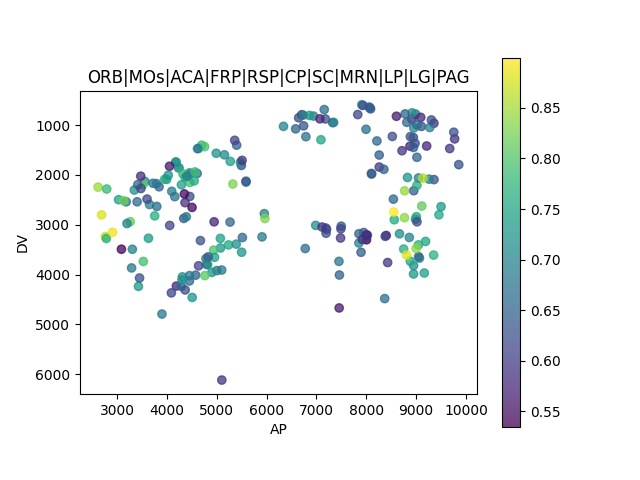

In [16]:
sel_area='ORB|MOs|ACA|FRP|RSP|CP|SC|MRN|LP|LG|PAG'
# sel_area='CP'
# sel_area='SC'
# sel_area='MRN'
# sel_area='MOp'
# sel_area='VIS'
# sel_area='AUD'
# sel_area='RSP'

area_insertions=ccf_coords_by_session_area.query('structure.str.contains(@sel_area) and average_performance>@dprime_threshold')

fig,ax=plt.subplots(1,1)
points=ax.scatter(area_insertions['x'],area_insertions['y'],c=area_insertions['decoder_accuracy_20_units'],alpha=0.75)
# ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlabel('AP')
ax.set_ylabel('DV')
ax.set_title(sel_area)
ax.set_aspect('equal')
fig.colorbar(ax=ax,mappable=points)

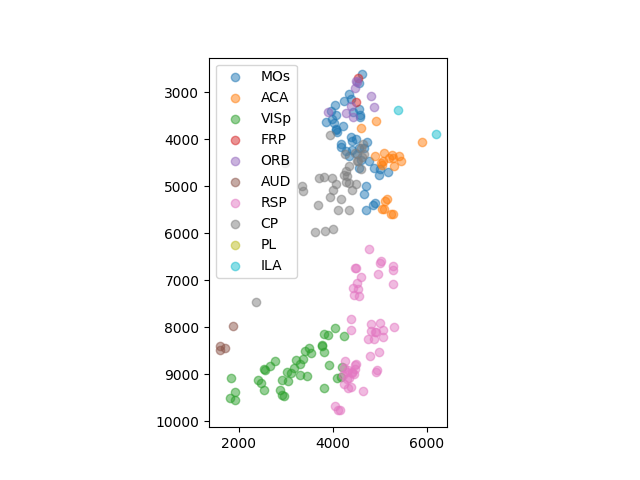

In [20]:
sel_areas=['MOs','ACA','VISp','FRP','ORB','AUD','RSP','CP','PL','ILA']

fig,ax=plt.subplots(1,1)
for sel_area in sel_areas:
    area_insertions=ccf_coords_by_session_area.query('structure.str.startswith(@sel_area) and average_performance>@dprime_threshold')
    points=ax.scatter(area_insertions['z'],area_insertions['x'],label=sel_area,alpha=0.5)

# ax.invert_xaxis()
ax.invert_yaxis()
ax.set_aspect('equal')
ax.legend()

In [ ]:
ccf_coords_by_session_area.query('structure.str.startswith("VIS")')

In [ ]:
# fig,ax=plt.subplots(1,1,figsize=(10,10))

plot_areas=['AUDp','VISli','MOs']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
for sa in ccf_coords_by_session_area['structure'].unique():
    if sa in plot_areas:
        ax.scatter(ccf_coords_by_session_area.query('structure==@sa')['x'],
                ccf_coords_by_session_area.query('structure==@sa')['y'],
                ccf_coords_by_session_area.query('structure==@sa')['z'],
                label=sa)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.invert_yaxis()
ax.invert_zaxis()
ax.legend()

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
plot_areas=['AUDp','VISli','MOs']
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(projection='3d')
for sa in ccf_coords_by_session_area['structure'].unique():
    if sa in plot_areas:
        ax.scatter(ccf_coords_by_session_area.query('structure==@sa')['z'],
                ccf_coords_by_session_area.query('structure==@sa')['x'],
                label=sa)
ax.set_xlabel('ML')
ax.set_ylabel('AP')
# ax.set_zlabel('z')
ax.invert_yaxis()
ax.invert_xaxis()
# ax.invert_zaxis()
ax.legend()